In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

In [61]:

# OpenWeatherMap API Key
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=nanortalik
Processing Record 2 of Set 1 | manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=manokwari
Processing Record 3 of Set 1 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=souillac
Processing Record 4 of Set 1 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=geraldton
Processing Record 5 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia
Processing Record 6 of Set 1 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=attawapiskat
City not found

Processing Record 2 of Set 2 | samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=samusu
City not found. Skipping...
Processing Record 3 of Set 2 | yuzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=yuzhou
Processing Record 4 of Set 2 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=port%20blair
Processing Record 5 of Set 2 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=talnakh
Processing Record 6 of Set 2 | saint-leu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-leu
Processing Record 7 of Set 2 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=makakilo%20city
Processing Record 8 of Set 2 | berlevag
http://api

Processing Record 6 of Set 3 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=airai
Processing Record 7 of Set 3 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hithadhoo
Processing Record 8 of Set 3 | arkadak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=arkadak
Processing Record 9 of Set 3 | anloga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=anloga
Processing Record 10 of Set 3 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=vila%20franca%20do%20campo
Processing Record 11 of Set 3 | nkowakowa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=nkowakowa
Processing Record 12 of Set 3 | cayenne
http://api.openweatherma

Processing Record 9 of Set 4 | ubinskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ubinskoye
Processing Record 10 of Set 4 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=gat
Processing Record 11 of Set 4 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=faya
Processing Record 12 of Set 4 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=port%20alfred
Processing Record 13 of Set 4 | hammerfest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hammerfest
Processing Record 14 of Set 4 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sinnamary
Processing Record 15 of Set 4 | karamken
http://api.openweathermap.org/data/2.5/weath

Processing Record 12 of Set 5 | nicholasville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=nicholasville
Processing Record 13 of Set 5 | celestun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=celestun
Processing Record 14 of Set 5 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kavieng
Processing Record 15 of Set 5 | chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=chifeng
Processing Record 16 of Set 5 | montepuez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=montepuez
Processing Record 17 of Set 5 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ancud
Processing Record 18 of Set 5 | kutum
http://api.openweathermap.org/data/2.5/wea

Processing Record 15 of Set 6 | kenora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kenora
Processing Record 16 of Set 6 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ahuimanu
Processing Record 17 of Set 6 | alta floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=alta%20floresta
Processing Record 18 of Set 6 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kenai
Processing Record 19 of Set 6 | sidi ali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sidi%20ali
Processing Record 20 of Set 6 | laiagam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=laiagam
City not found. Skipping...
Processing Record 21 of Set 6 | huallanca
http://api

Processing Record 18 of Set 7 | wahran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=wahran
City not found. Skipping...
Processing Record 19 of Set 7 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=haines%20junction
Processing Record 20 of Set 7 | puerto carreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=puerto%20carreno
Processing Record 21 of Set 7 | ust-karsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ust-karsk
Processing Record 22 of Set 7 | manzanillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=manzanillo
Processing Record 23 of Set 7 | mpongwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mpongwe
Processing Record 24 of 

Processing Record 21 of Set 8 | celina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=celina
Processing Record 22 of Set 8 | oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=oistins
Processing Record 23 of Set 8 | olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=olinda
Processing Record 24 of Set 8 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saskylakh
Processing Record 25 of Set 8 | turan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=turan
Processing Record 26 of Set 8 | bela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bela
Processing Record 27 of Set 8 | rabaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 24 of Set 9 | neuquen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=neuquen
Processing Record 25 of Set 9 | matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=matara
Processing Record 26 of Set 9 | omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=omsukchan
Processing Record 27 of Set 9 | bundaberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bundaberg
Processing Record 28 of Set 9 | tadine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tadine
Processing Record 29 of Set 9 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=san%20cristobal
Processing Record 30 of Set 9 | oudtshoorn
http://api.openweathermap.org/dat

Processing Record 26 of Set 10 | motygino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=motygino
Processing Record 27 of Set 10 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=vanavara
Processing Record 28 of Set 10 | northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=northam
Processing Record 29 of Set 10 | traralgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=traralgon
Processing Record 30 of Set 10 | turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=turukhansk
Processing Record 31 of Set 10 | nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=nalut
Processing Record 32 of Set 10 | agadir
http://api.openweathermap.org/data/2.5

Processing Record 29 of Set 11 | cobija
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cobija
Processing Record 30 of Set 11 | lewistown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lewistown
Processing Record 31 of Set 11 | san andres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=san%20andres
Processing Record 32 of Set 11 | rae bareli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rae%20bareli
Processing Record 33 of Set 11 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=aykhal
Processing Record 34 of Set 11 | dothan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=dothan
Processing Record 35 of Set 11 | jiddah
http://api.openweathermap.org/data

In [62]:
city_weather

{'cod': '404', 'message': 'city not found'}

In [66]:
# show the DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nanortalik,0,GL,1532561633,88,60.14,-45.24,41.06,7.99
1,manokwari,56,ID,1532561633,100,-0.87,134.08,82.37,4.18
2,souillac,0,FR,1532559600,73,45.60,-0.60,71.60,2.24
3,geraldton,75,CA,1532559600,49,49.72,-86.95,71.60,14.99
4,ushuaia,20,AR,1532559600,60,-54.81,-68.31,39.20,17.72


In [64]:
#assign each column names 
lats = city_data_pd['Lat']
max_temps = city_data_pd['Max Temp']
humidity = city_data_pd['Humidity']
cloudiness = city_data_pd['Cloudiness']
windspeed = city_data_pd['Wind Speed']

city_data_pd.to_csv(output_data_file, index_label='City_Data')

city_data_pd.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

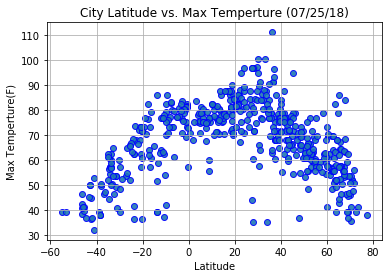

In [68]:
#create scatter plot for Temperature (F) vs. Latitude
plt.scatter(lats, max_temps, edgecolor='blue', linewidths=1,marker='o',
           alpha=0.9, label='Cities')

plt.title('City Latitude vs. Max Temperture (%s)'% time.strftime('%x'))
plt.ylabel('Max Temperture(F)')
plt.xlabel('Latitude')
plt.grid()

plt.savefig('Resources/Fig1.png')

plt.show()


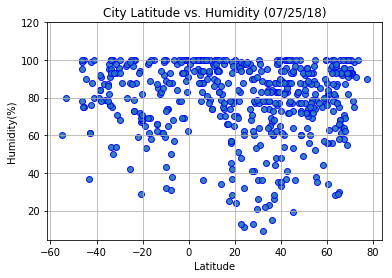

In [69]:
# Humidity (%) vs. Latitude

plt.scatter(lats, humidity, edgecolor='blue', linewidths=1,marker='o',
           alpha=0.9, label='Cities')

plt.title('City Latitude vs. Humidity (%s)'% time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.ylim(ymax=120)
plt.grid()

plt.savefig('Resources/Fig2.png')

plt.show()


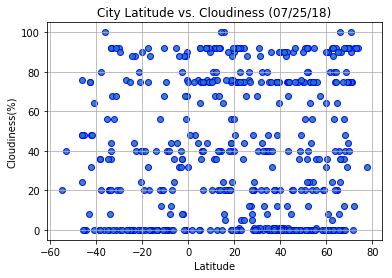

In [70]:
# Cloudiness (%) vs. Latitude
plt.scatter(lats, cloudiness,edgecolor='blue', linewidths=1,marker='o',
           alpha=0.9, label='Cities')

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

plt.savefig('Resources/Fig3.png')

plt.show()

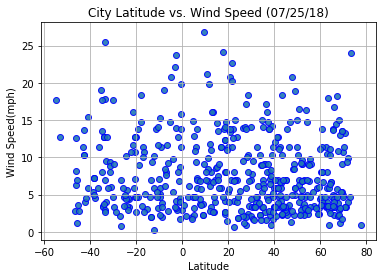

In [71]:
# Wind Speed (mph) vs. Latitude
plt.scatter(lats,windspeed,edgecolor='blue', linewidths=1,marker='o',
           alpha=0.9, label='Cities')

plt.title('City Latitude vs. Wind Speed (%s)'% time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()

plt.savefig('Resources/Fig4.png')

plt.show()